#### Name: Om Pravin Ghag
#### Roll No.: 21102B0002
#### BE CMPN-B
#### Batch - 1
#### GitHub Link: https://github.com/OmGhag/SVM-Machine-Learning.git

In [10]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [12]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [13]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 32, test_size= 0.2, shuffle= True)

In [35]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4276,6.2,0.250,0.31,3.20,0.030,32.0,150.0,0.99014,3.18,0.31,12.0
4668,7.0,0.530,0.43,6.10,0.029,6.0,76.0,0.99118,3.08,0.50,12.5
4648,7.5,0.330,0.38,8.70,0.126,49.0,199.0,0.99711,2.98,0.57,9.4
1891,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1
2413,7.9,0.350,0.24,15.60,0.072,44.0,229.0,0.99785,3.03,0.59,10.5
...,...,...,...,...,...,...,...,...,...,...,...
4030,6.3,0.290,0.14,7.05,0.045,50.0,177.0,0.99564,3.23,0.42,9.0
2940,7.6,0.540,0.23,2.00,0.029,13.0,151.0,0.99310,3.04,0.33,10.4
1334,7.2,0.835,0.00,2.00,0.166,4.0,11.0,0.99608,3.39,0.52,10.0
1579,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3


In [36]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2919,7.6,0.19,0.42,1.5,0.044,6.0,114.0,0.99140,3.04,0.74,12.8
2817,7.2,0.26,0.44,7.1,0.027,25.0,126.0,0.99300,3.02,0.34,11.1
5116,6.6,0.29,0.29,1.8,0.036,38.0,102.0,0.98819,3.08,0.42,13.7
2948,9.2,0.35,0.39,0.9,0.042,15.0,61.0,0.99240,2.96,0.28,10.4
134,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9
...,...,...,...,...,...,...,...,...,...,...,...
5525,6.9,0.14,0.29,9.9,0.056,30.0,91.0,0.99512,3.19,0.33,9.9
1656,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9
4563,5.8,0.19,0.24,1.3,0.044,38.0,128.0,0.99362,3.77,0.60,10.6
2191,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.4


In [42]:
svmclf = SVC(kernel= 'rbf')

In [43]:
svmclf.fit(x_train, y_train)

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [44]:
y_pred = svmclf.predict(x_test)

In [45]:
acc = accuracy_score(y_test, y_pred)

In [46]:
acc

0.4523076923076923

In [47]:
svmclf = SVC(kernel= 'linear')

In [48]:
svmclf.fit(x_train, y_train)

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [50]:
y_pred_l = svmclf.predict(x_test)

In [51]:
acc_l = accuracy_score(y_test, y_pred_l)

In [52]:
acc_l

0.5238461538461539

In [53]:
svmclf = SVC(kernel='poly', degree=11)
svmclf.fit(x_train, y_train)

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=11, kernel='poly')

In [55]:
y_pred_p11 = svmclf.predict(x_test)

In [56]:
acc_p11 = accuracy_score(y_test, y_pred_p11)

In [57]:
acc_p11

0.4646153846153846

In [58]:
svmclf = SVC(kernel='poly', degree=11, gamma= 'scale')
svmclf.fit(x_train, y_train)
y_pred_p11 = svmclf.predict(x_test)
acc_p11_gs = accuracy_score(y_test, y_pred_p11)
acc_p11_gs

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4646153846153846

In [59]:
svmclf = SVC(kernel='linear',probability=True, gamma= 'scale')
svmclf.fit(x_train, y_train)
y_pred_p11 = svmclf.predict(x_test)
acc_p11_gs = accuracy_score(y_test, y_pred_p11)
acc_p11_gs

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5238461538461539

In [65]:
svmclf = SVC(kernel='rbf',probability=True, gamma= 'auto', C = 1.0)
svmclf.fit(x_train, y_train)
y_pred_rbf = svmclf.predict(x_test)


C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_rbf

0.5692307692307692

In [71]:
precision = precision_score(y_test, y_pred_rbf, labels=None, pos_label=None, average='macro', sample_weight=None, zero_division=0)

In [72]:
precision

0.36273360217275696

In [74]:
recall = recall_score(y_test, y_pred_rbf, labels=None, pos_label=None, average='macro', sample_weight=None, zero_division=0)
recall

0.2457538088132653

In [75]:
f1score = f1_score(y_test, y_pred_rbf, labels=None, pos_label=None, average='macro', sample_weight=None, zero_division=0)
f1score

0.2570496272239021

In [78]:
roc_auc = roc_auc_score(y_test, svmclf.predict_proba(x_test), multi_class='ovr')
roc_auc

0.6801437372008926

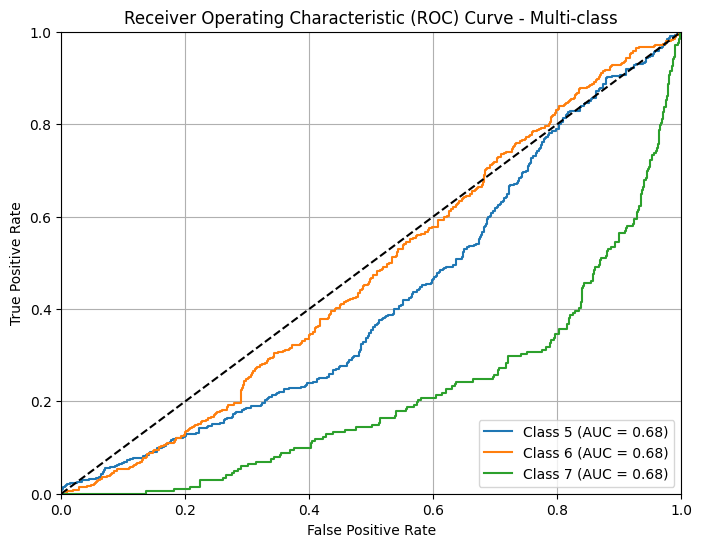

In [79]:
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multi-class (e.g., if classes are 0, 1, 2)
y_test_bin = label_binarize(y_test, classes=[5, 6, 7])  # Adjust classes according to your labels

# Get predicted probabilities for all classes
predicted_probabilities = svmclf.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate([5, 6, 7]):  # Adjust classes according to your labels
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.grid()
plt.show()